# Balistron Battery Pack test of 23rd April 2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import mercury as mr # for widgets

# Replace 'file_name.txt' with the name of your txt file

df = pd.read_csv('C:\\Users\\admin\\Documents\\GitHub\\Pyhton_Jupiter\\Data\\Battery\\E2209.txt',  header=None, na_values=[''], skipinitialspace=True)
df.dropna(inplace = True)

# Iterate through each column
for col in df.columns:
    Data =df[col].str.split(';', expand=True)
# get all the 28 Strings voltages
for col in df.columns:
    Strings = ((Data.iloc[:, 30:57].astype(float))+200)/100
# All 6 temp probe and the max, min temp 
for col in df.columns:
    Temperatures = Data.iloc[:, 63:68].astype(float)


In [36]:
#Data.columns = ['a', 'b']
Data.rename(columns = {0:'Odometer', 1:'Speed kmh', 2:'Is in Reverse', 3:'Riding Mode', 4:'Vehicle status byte1', 5:'Vehicle status byte2', 6:'Throttle',
                       7:'MCU Temp', 8:'Motor temp', 9: 'BMS Cell Highest Voltage value', 10: 'BMS Cell Lowest Voltage value', 11:'SOC', 12:'Avg MOSTFet temp', 13: 'ECU volt', 14:'Charger Volt', 15:'Charger Current', 16: 'Num Ative ERROR', 17: 'Sum Active ERROR', 18: 'Input Head light', 19: 'Turn left', 20: 'Turn Right', 21:'Mode Switch', 22: 'Kick Stand', 23: 'Kill switch', 24:'Power flag', 25:'Key', 26:'Fast Charge', 27:'Brake', 28: 'Turn left delay', 29:'Turn right delay'}, inplace = True)


## Battery pack Volatge 
The below information are collected from the battery management system 

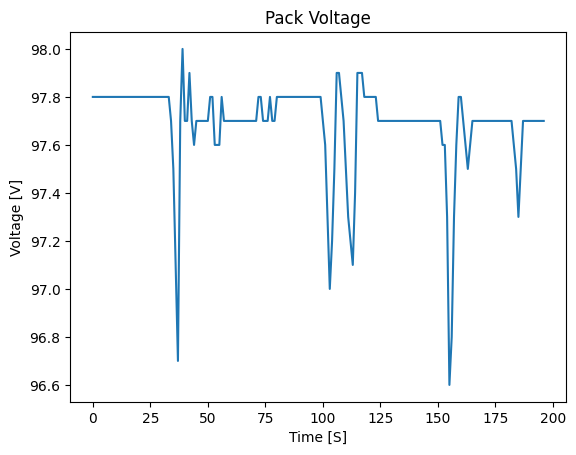

In [13]:
Pack_Volatge =(Data.iloc[:, 29].astype('float64'))/10.0
#Plot data in column 30
plt.plot(Pack_Volatge)
plt.title('Pack Voltage')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

### Battery Pack SOC

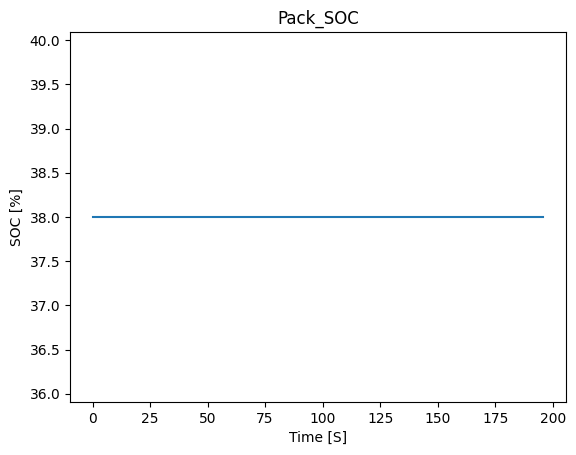

In [14]:
Pack_SOC =(Data.iloc[:, 69].astype('float64'))
# Plot data in column 30
plt.plot(Pack_SOC)
plt.title('Pack_SOC')
plt.xlabel('Time [S]')
plt.ylabel('SOC [%]')
plt.show()

### Battery Pack discharge Current 

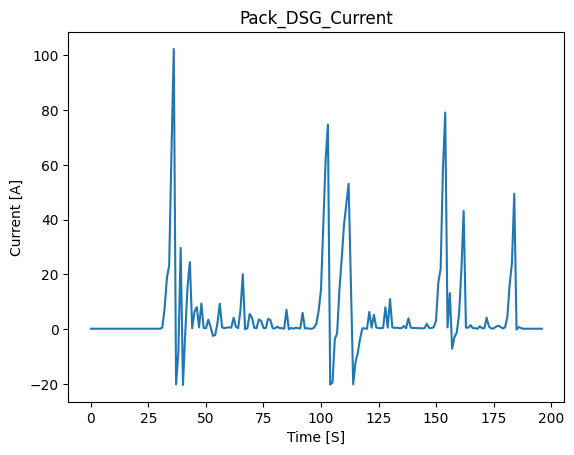

In [15]:
Pack_DSG_Current =(Data.iloc[:, 62].astype('float64'))/10
# Plot data in column 30
plt.plot(Pack_DSG_Current)
plt.title('Pack_DSG_Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()


### String Voltages 
They represent the individual cells that make the battery pack

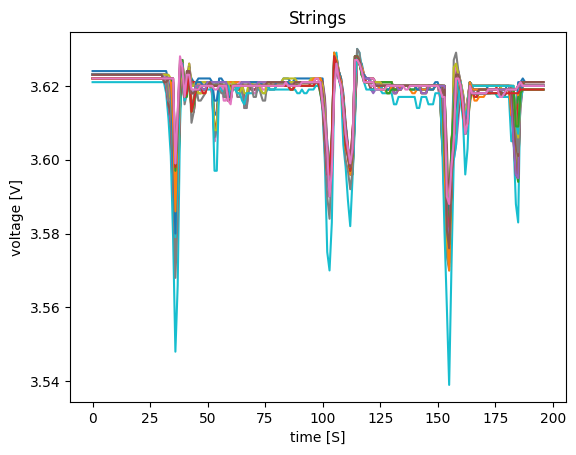

In [16]:
# Strings 
plt.plot(Strings)
plt.title('Strings')
plt.xlabel('time [S]')
plt.ylabel('voltage [V]')
plt.show()

### Strong and weak cell 
This necessary for the SOF estimation because it helps estimate the aging of the weakest cell 

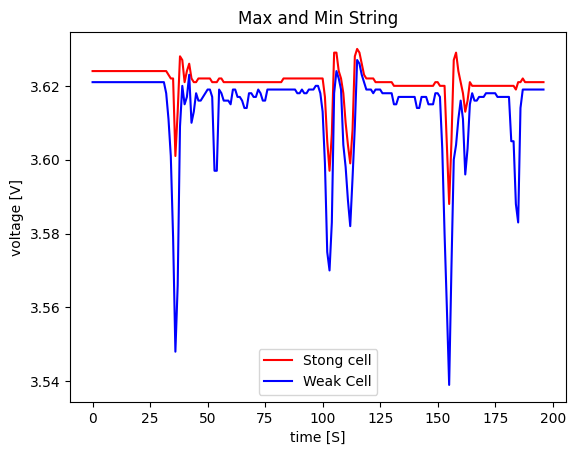

In [17]:
max_String = Strings.max(axis=1)
min_String = Strings.min(axis=1)
# plot the maximum and minimum String voltage
plt.plot(max_String, label='Stong cell', color='red')
plt.plot(min_String, label='Weak Cell', color='blue')
# set the title, x-axis label, y-axis label, and legend
plt.title('Max and Min String')
plt.xlabel('time [S]')
plt.ylabel('voltage [V]')
plt.legend()

plt.show()

### Delta V (Voltage difference between the highest and lowest cell)
With this data we can predict the operating condition of the battery

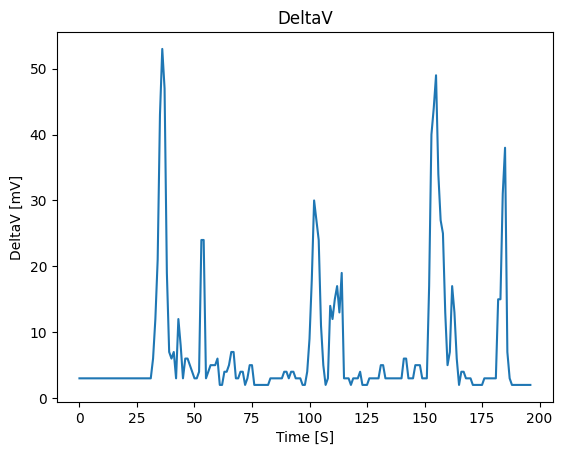

In [9]:
DeltaV = (max_String - min_String)*1000
# Plot data in column 30
plt.plot(DeltaV)
plt.title('DeltaV')
plt.xlabel('Time [S]')
plt.ylabel('DeltaV [mV]')
plt.show()

### Temperature values 

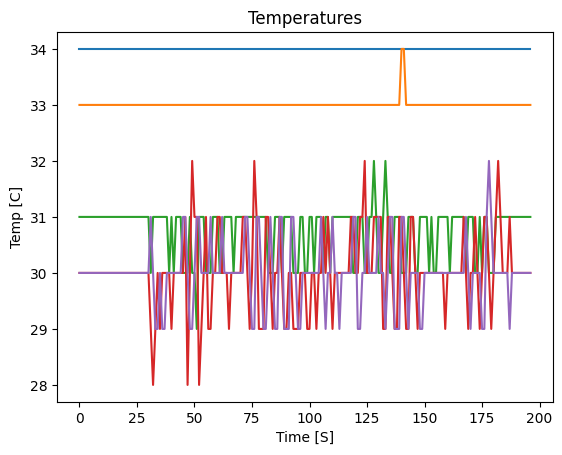

In [10]:
# plot the 4 temp probes values 
plt.plot(Temperatures)
# set the title, x-axis label, y-axis label, and legend
plt.title('Temperatures')
plt.xlabel('Time [S]')
plt.ylabel('Temp [C]')
plt.show()

### MAX and MIN Temperature values 

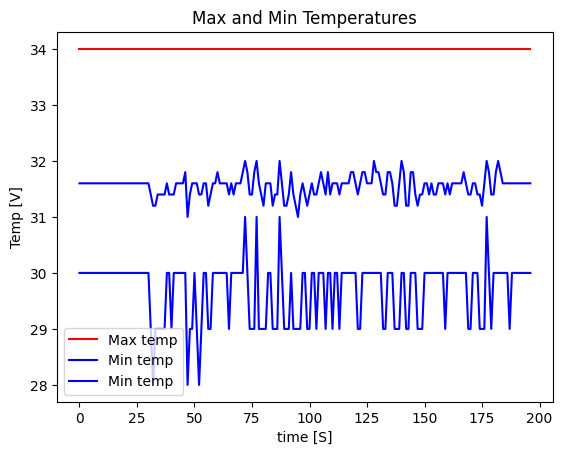

In [11]:
plt.plot(Temperatures.max(axis=1),label='Max temp', color='red')
plt.plot(Temperatures.min(axis=1),label='Min temp', color='blue')
plt.plot(Temperatures.mean(axis=1),label='Min temp', color='blue')
# set the title, x-axis label, y-axis label, and legend
plt.title('Max and Min Temperatures')
plt.xlabel('time [S]')
plt.ylabel('Temp [V]')
plt.legend()
plt.show()

# <center>Inverter or Motor Motor Controller 
This section will have to do with everything related to the Motor, Traction system, riding style and some time the cooling system if added

## MCU voltage
- This help the engineer confirm the accuracy of the battery voltage sent from the BMS and something compare it to the Charger reading
- It's also used by the controller as protection parameter (OV)

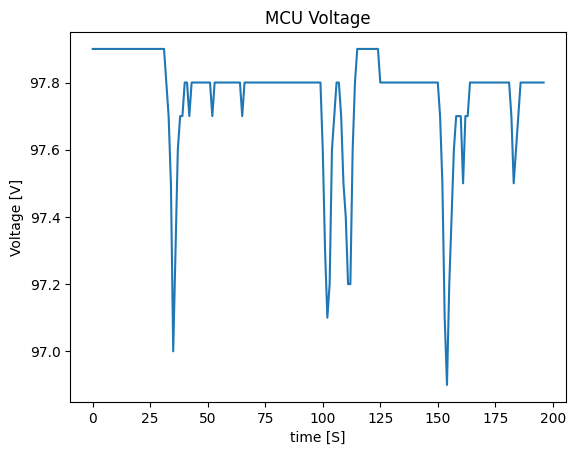

In [4]:
MCU_Voltage = (Data.iloc[:, 81].astype(float))/10  # the MCU volatge
plt.plot(MCU_Voltage)
# set the title, x-axis label, y-axis label, and legend
plt.title("MCU Voltage")
plt.xlabel('time [S]')
plt.ylabel('Voltage [V]')
plt.show()

## MCU voltage current 
- This represent the phase current or AC current from the Motor Controller to the Motor 

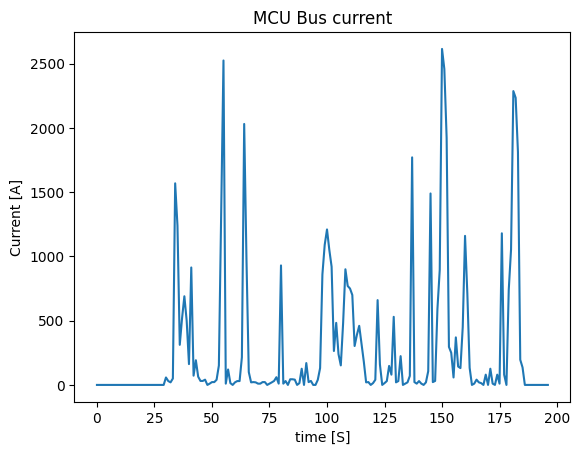

In [6]:
MCUBus_Current = Data.iloc[:, 82].astype(float)
plt.plot(MCUBus_Current)
# set the title, x-axis label, y-axis label, and legend
plt.title("MCU Bus current")
plt.xlabel('time [S]')
plt.ylabel('Current [A]')
plt.show()

## Vehicle RPM 
This is the revolution per minute of the Motor read from the Motor Controler

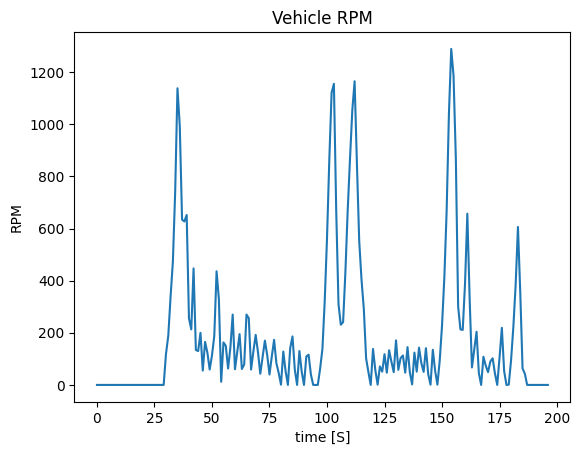

In [7]:
RPM = Data.iloc[:, 83].astype(float)               # the RPM of the vehicle
plt.plot(RPM)
# set the title, x-axis label, y-axis label, and legend
plt.title("Vehicle RPM")
plt.xlabel('time [S]')
plt.ylabel('RPM')
plt.show()

## Motor temperature 
This represents the temperature value sent from the temp probe inside the motor <br>
In most our current motor, the KTY84_130 temp sensor is used as temp probe

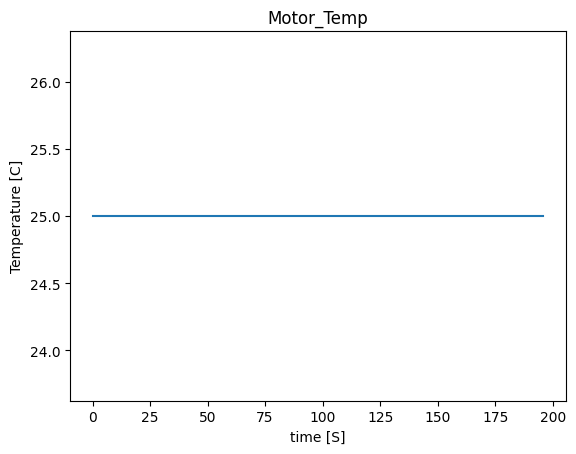

In [8]:
Motor_Temp = Data.iloc[:, 84].astype(float)
plt.plot(Motor_Temp)
# set the title, x-axis label, y-axis label, and legend
plt.title("Motor_Temp")
plt.xlabel('time [S]')
plt.ylabel('Temperature [C]')
plt.show()

## Inverter Temperature 


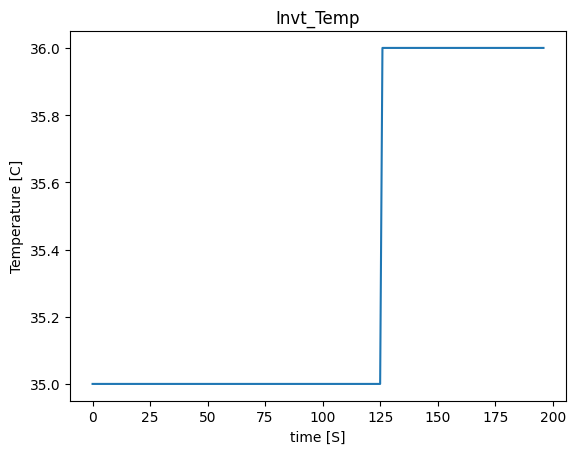

In [9]:
Invt_Temp = Data.iloc[:, 85].astype(float)
plt.plot(Invt_Temp)
# set the title, x-axis label, y-axis label, and legend
plt.title("Invt_Temp")
plt.xlabel('time [S]')
plt.ylabel('Temperature [C]')
plt.show()

## MCU Status Byte
This include:
1. Run   Send/Receive
2. Reverse  Send/Receive
3. Brake H/L

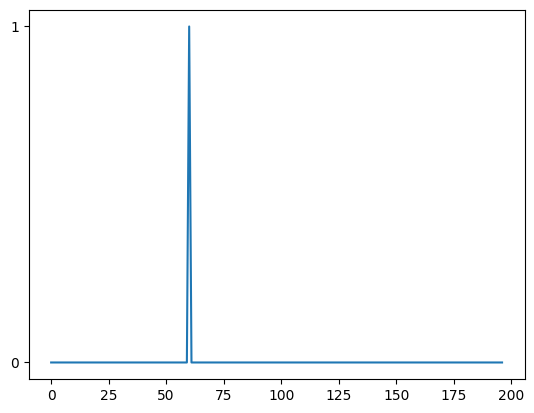

In [11]:
MCU_state = Data.iloc[:, 89].astype(int)
Brake_H = []
Run_Receive = []
Run_Send = []
Reverse_receive = []
for i in MCU_state:
    Brake_H.append(bin(i)[5])  # Break receive
    Run_Receive.append(bin(i)[4])
    Run_Send.append(bin(i)[2])
    Reverse_receive.append(bin(i)[6])  # Get One when Reverse is trigged

# This should be done a subplot
plt.plot(Brake_H)
plt.show()

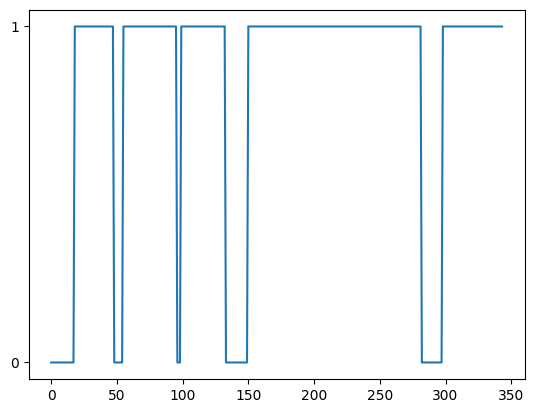

In [22]:

# RPM = Data.iloc[:, 83].astype(float)               # the RPM of the vehicle


# Speed = Data.iloc[:, 13].astype(float)
# Chrg_Voltage = (Data.iloc[:, 94].astype(float))/10
# Chrg_Current = (Data.iloc[:, 95].astype(float))/10
# Odometer = (Data.iloc[:, 11].astype(float))*100
# Trip = (Data.iloc[:, 12].astype(float))
# Fan_speed =(Data.iloc[:, 102].astype(float))
# Riding_Mode = (Data.iloc[:, 96].astype(float))
boardTemp  =  Data.iloc[:, 9].astype(int)  # ECU temperature
boardSupplyVoltage =  Data.iloc[:, 10].astype(float)/10
# MCU_MaxRegen =  Data.iloc[:, 91].astype(float)  # Not yet sure.
#The sates of the MCU will have the 


# Start with Vehicle inf
vehicleStatuByte2 = Data.iloc[:, 18].astype(int)  # fro the riding mode and BMS, MCU, Throttle
vehicleStatuByte1 = Data.iloc[:, 17].astype(int)  # fro the riding mode and 




City_Mode = []
Pro_Mode = []
ECO_Mode = []
BMS_CON = []
MCU_CON1 = []
for i in vehicleStatuByte2:
    ECO_Mode.append(bin(i)[6])
    City_Mode.append(bin(i)[8])  # City Mode
    Pro_Mode.append(bin(i)[7])
    BMS_CON.append(bin(i)[4])
    MCU_CON1.append(bin(i)[3])
# #print(ECO_Mode)

Storage_Mode = []
Lock_Mode = []
Charger_CON = []
Reverse_Mode3S = []
IsCharging = []
Fast_Charge = []

for i in vehicleStatuByte1:
    Storage_Mode.append(bin(i)[1])
    Lock_Mode.append(bin(i)[2])  # City Mode
    Reverse_Mode3S.append(bin(i)[3])
    Charger_CON.append(bin(i)[4])
    IsCharging.append(bin(i)[5])
    Fast_Charge.append(bin(i)[5])
    
plt.figure()
plt.plot(IsCharging)

In [33]:
# getting your message as int
i = int("140900793d002327", 16)

# getting bit at position 28 (counting from 0 from right)
print((i >> 28) & 1)

# getting bits at position 24-27
bin((i >> 24) & 0b111)

#plt.plot(Data.iloc[:, 89])
# for i in MCU_state:
#     print(bin(i))
j = MCU_state[0]  
print(bin(j))
print(bin((j >>5) & 0b100))
#Set bit 3 to 0

1


'0b101'

1.1122222222222222


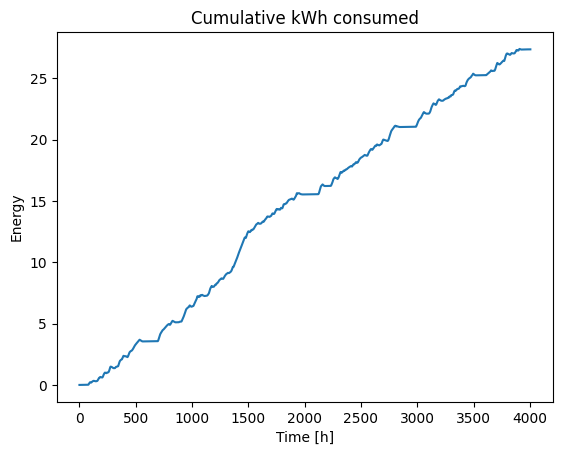

In [27]:
global time
time = list([0])
for col in df.columns:
    Energy =(Pack_Volatge*Pack_DSG_Current*(1/3600)) 
    #time =col/3600  
total_energy = Energy.cumsum()
for i in  range(0, len(Pack_Volatge)):
    time = (i/3600)
print(time)
plt.plot(total_energy)
plt.title("Cumulative kWh consumed")
plt.xlabel("Time [h]")
plt.ylabel("Energy")
plt.show()

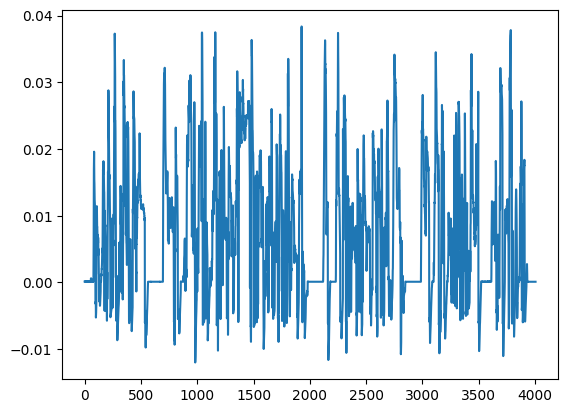

In [15]:
plt.plot(Energy)

In [21]:
import pandas as pd

# Take a DataFrame
df = pd.DataFrame({
    'name': ['apple', 'banana', 'cherry', 'fig', 'mango', 'pear'],
    'quantity': [14, 0, 0, 37, 25, 80]
})

# Select rows whose index is odd
df_odd_rows = df.iloc[1::2]

# Print DataFrame
print(f"Original DataFrame\n{df}\n")
print(f"Rows at odd index\n{df_odd_rows}")

Original DataFrame
     name  quantity
0   apple        14
1  banana         0
2  cherry         0
3     fig        37
4   mango        25
5    pear        80

Rows at odd index
     name  quantity
1  banana         0
3     fig        37
5    pear        80
